In [1]:
from utils.dataset import TradingDataset
from utils.normalizer import TradingNormalizer

normalizer = TradingNormalizer(method='log_returns')

dataset = TradingDataset(
    'data/', 
    mode='validation',
    history_len=256,
    target_len=32,
    normalizer=normalizer,
)

Found 56463 samples for validation mode


In [29]:
from models.model_wrapper import TradingModel

model = TradingModel.from_pretrained('pretrained-models/TradingCNN') 
# model = TradingModel.from_pretrained('pretrained-models/TradingFFN') 
# model = TradingModel.from_pretrained('pretrained-models/TradingLSTM') 
# model = TradingModel.from_pretrained('pretrained-models/TradingTCN') 
# model = TradingModel.from_pretrained('pretrained-models/TradingTFT') 

# model = TradingModel.from_pretrained('pretrained-models/TradingTransformer')


Модель TradingCNN успешно загружена из pretrained-models/TradingCNN


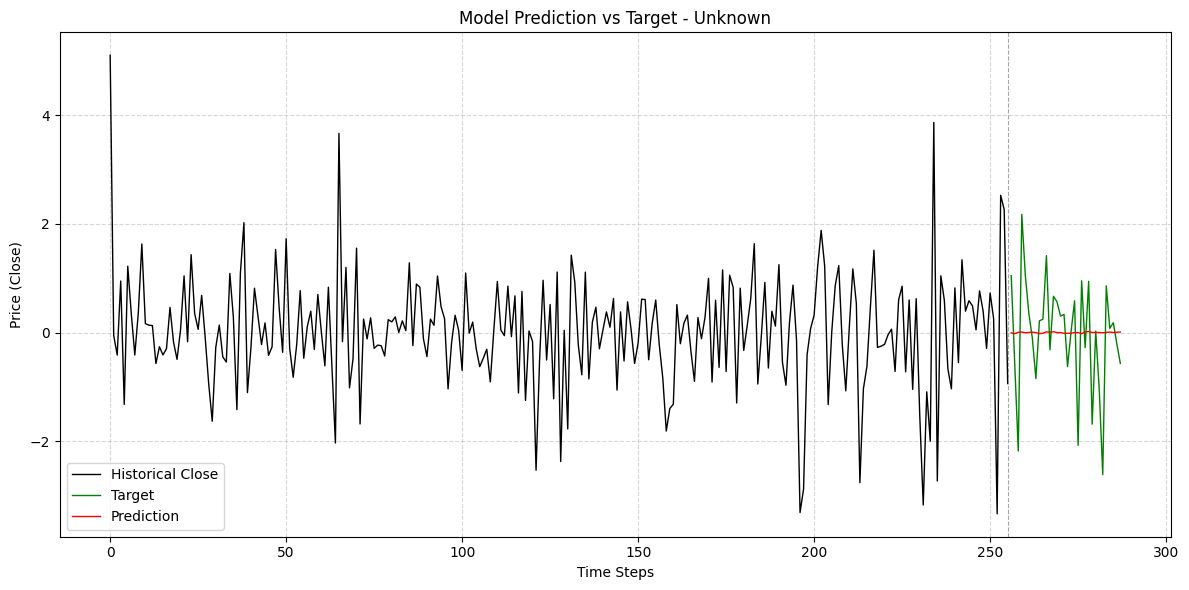

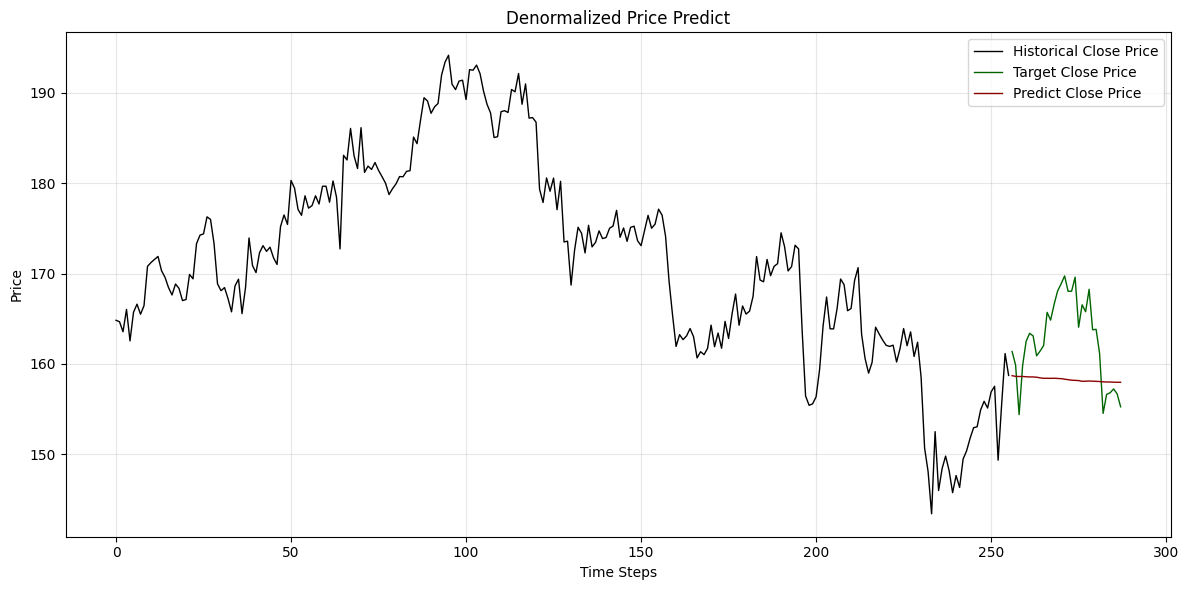

In [70]:
import torch
from utils.visualization import plot_model_prediction, plot_model_prediction_denormalized

sample = dataset[torch.randint(0, len(dataset), (1,)).item()]
history = sample['history'].to(model.device)
model_pred = model(history)

plot_model_prediction(sample['history'], sample['target'], model_pred)
plot_model_prediction_denormalized(sample['history'], sample['target'], sample['stats'], model_pred)